# PROJECT OVERVIEW

# Stakeholder : 

SyriaTel, a telecommunications company.

# Business Understanding

SyriaTel wants to reduce customer churn, as retaining customers is more cost-effective than acquiring new ones. The goal is to build a model that predicts whether a customer will "soon" stop doing business with SyriaTel. This will help SyriaTel take proactive measures to retain customers.

The project focuses on identifying patterns in customer behavior that indicate the likelihood of churn. These patterns can include factors like customer service interactions, usage metrics, and contract details. The goal is to create a predictive model that can classify customers as churners or non-churners with high accuracy, enabling the company to intervene before a customer leaves.

# Project Goal

Build a classification model to predict customer churn and provide insights into the factors contributing to churn.

# Business Objectives


a. Reduce Customer Churn: The primary business objective is to reduce the rate at which customers leave SyriaTel. By identifying customers who are likely to churn, the company can take proactive measures to retain them, such as targeted marketing campaigns, personalized offers, or improving customer service.


b. Increase Revenue: By reducing churn, SyriaTel can maintain a more stable customer base, leading to increased customer lifetime value (CLTV) and higher overall revenue. Retaining existing customers is often more cost-effective than acquiring new ones.


c. Enhance Customer Satisfaction: Understanding the reasons behind customer churn can help SyriaTel address underlying issues, leading to improved customer satisfaction and loyalty.


d. Optimize Marketing Strategies: The insights gained from the churn prediction model can be used to create more effective and targeted marketing strategies, focusing on customers who are at risk of leaving.

## Data Preparation:


Step 1: Import Neccessary Libraries

In [32]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Model tuning
from sklearn.model_selection import GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")


Step 2: Load the data

In [33]:
df = pd.read_csv(r'C:/Users/user/Desktop/phase 3/phase 3 project/bigml_59c28831336c6604c800002a.csv')

3. Exploratory Data Analysis (EDA)
Goal: Understand and clean the dataset and the relationships between features.

In [34]:
# Display the first few rows of the dataset
print(df.head())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [35]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [36]:
# Check for missing values
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [37]:
# Summary statistics
print(df.describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# If there are missing values, decide on a strategy (e.g., drop or fill)
df = df.dropna()  # Example: Dropping rows with missing values


Missing values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [39]:
# Check column names in the DataFrame
print(df.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [59]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicates and drop them if necessary
df.drop_duplicates(inplace=True)


Missing values:
 state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
day_night_ratio           0
dtype: int64


In [40]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)

# Encode categorical variables using LabelEncoder or OneHotEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the dataframe after encoding
df.head()


Categorical Columns:
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:\n", numerical_cols)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the dataframe after scaling
df.head()


Numerical Columns:
 Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,0.676489,-0.523603,1926,0,1,1.234883,1.566767,0.476643,1.567036,...,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,False
1,35,0.149065,-0.523603,1575,0,1,1.307948,-0.333738,1.124503,-0.334013,...,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,False
2,31,0.902529,-0.523603,1117,0,0,-0.591760,1.168304,0.675985,1.168464,...,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,False
3,35,-0.428590,-0.688834,1707,1,0,-0.591760,2.196596,-1.466936,2.196759,...,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,False
4,36,-0.654629,-0.523603,110,1,0,-0.591760,-0.240090,0.626149,-0.240041,...,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,False


In [42]:
# Assuming 'churn' is the correct target column name
X = df.drop(columns=['churn'])  # Drop the target column from features
y = df['churn']  # Set the target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (2333, 20), X_test shape: (1000, 20)
y_train shape: (2333,), y_test shape: (1000,)


In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:/Users/user/Desktop/phase 3/phase 3 project/bigml_59c28831336c6604c800002a.csv')

# Function to describe each feature in the dataset
def describe_dataset(df):
    descriptions = {}
    
    for column in df.columns:
        dtype = df[column].dtype
        unique_values = df[column].nunique()
        top_value = df[column].mode()[0]
        description = f"**{column}**: ({dtype})\n"
        
        if dtype == 'object':
            description += f"   - Categorical feature with {unique_values} unique values.\n"
            description += f"   - Most common value: `{top_value}`.\n"
        else:
            description += f"   - Numerical feature.\n"
            description += f"   - Mean: {df[column].mean():.2f}, Min: {df[column].min()}, Max: {df[column].max()}.\n"
        
        if column == 'churn':
            description += "   - **Target variable** indicating whether the customer has churned (`True`/`False`).\n"
        
        descriptions[column] = description
    
    return descriptions

# Generate descriptions
descriptions = describe_dataset(df)

# Display descriptions
for feature, description in descriptions.items():
    print(description)
    print()


**state**: (object)
   - Categorical feature with 51 unique values.
   - Most common value: `WV`.


**account length**: (int64)
   - Numerical feature.
   - Mean: 101.06, Min: 1, Max: 243.


**area code**: (int64)
   - Numerical feature.
   - Mean: 437.18, Min: 408, Max: 510.


**phone number**: (object)
   - Categorical feature with 3333 unique values.
   - Most common value: `327-1058`.


**international plan**: (object)
   - Categorical feature with 2 unique values.
   - Most common value: `no`.


**voice mail plan**: (object)
   - Categorical feature with 2 unique values.
   - Most common value: `no`.


**number vmail messages**: (int64)
   - Numerical feature.
   - Mean: 8.10, Min: 0, Max: 51.


**total day minutes**: (float64)
   - Numerical feature.
   - Mean: 179.78, Min: 0.0, Max: 350.8.


**total day calls**: (int64)
   - Numerical feature.
   - Mean: 100.44, Min: 0, Max: 165.


**total day charge**: (float64)
   - Numerical feature.
   - Mean: 30.56, Min: 0.0, Max: 59.64.




In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'C:/Users/user/Desktop/phase 3/phase 3 project/bigml_59c28831336c6604c800002a.csv')

# Drop unnecessary columns (e.g., phone number)
df.drop(columns=['phone number'], inplace=True)

# Convert categorical columns to numerical
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Handle the target variable 'churn' (convert to integer)
df['churn'] = df['churn'].astype(int)

# Feature scaling (optional, depending on the model)
scaler = StandardScaler()
features = df.drop(columns=['state', 'churn'])
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['churn'], test_size=0.2, random_state=42)


Normality Testing

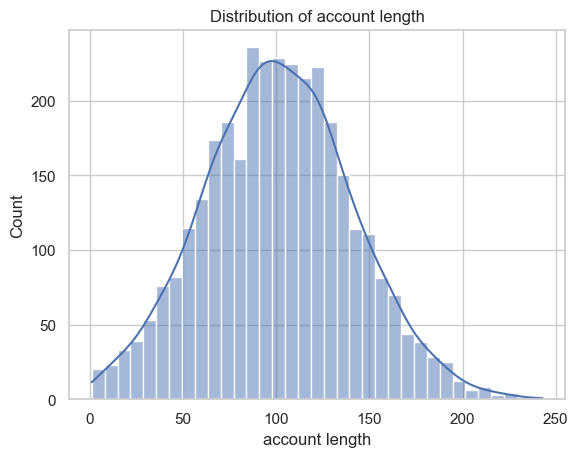

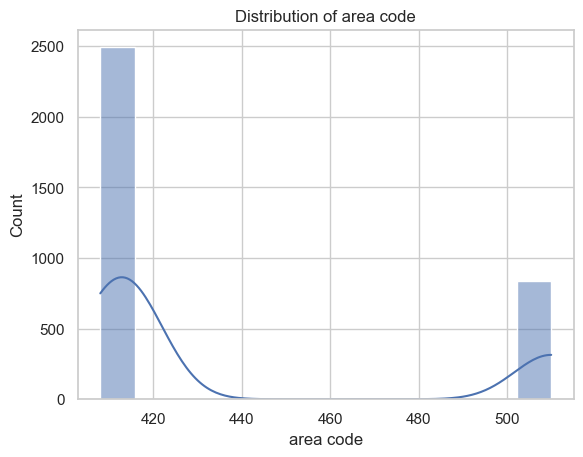

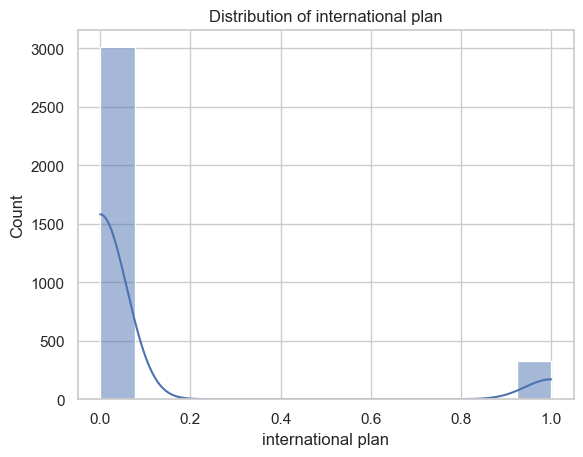

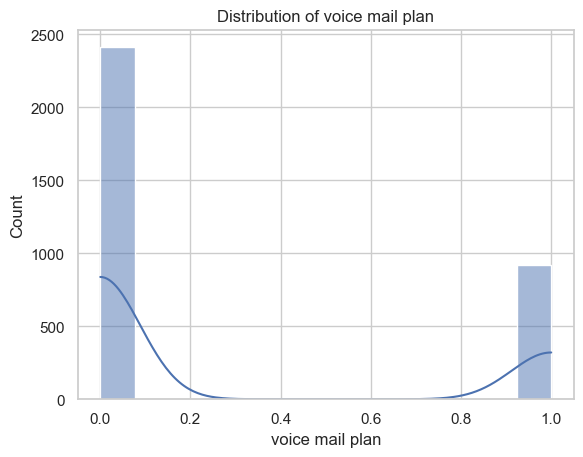

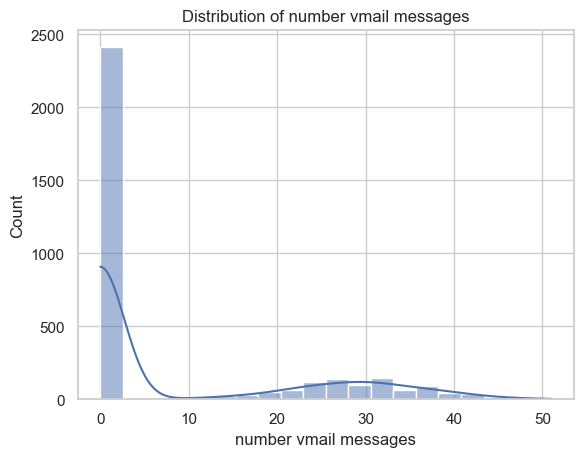

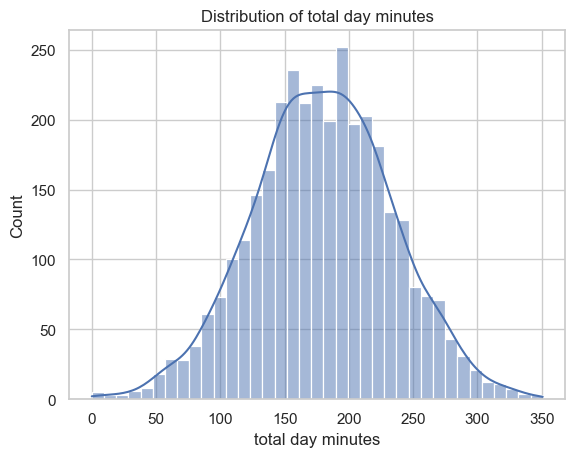

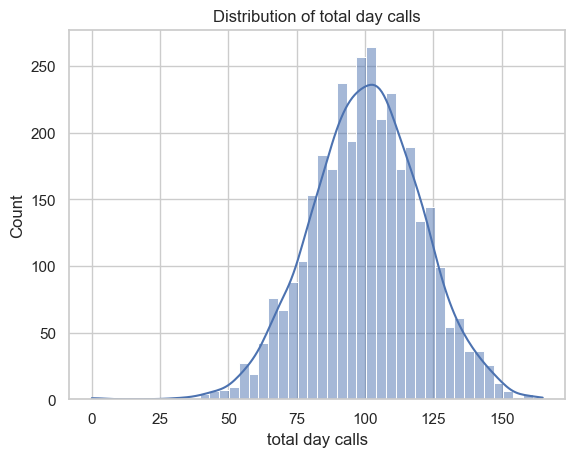

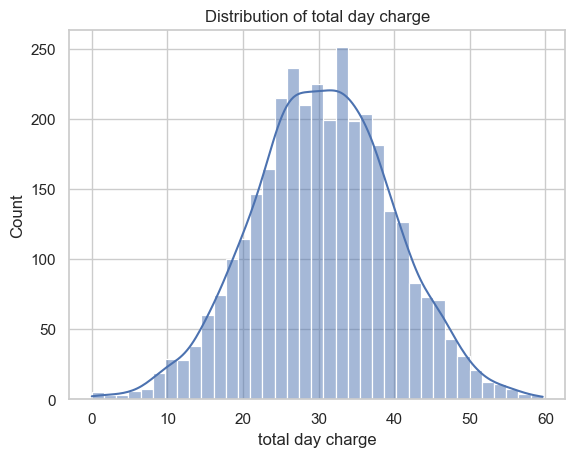

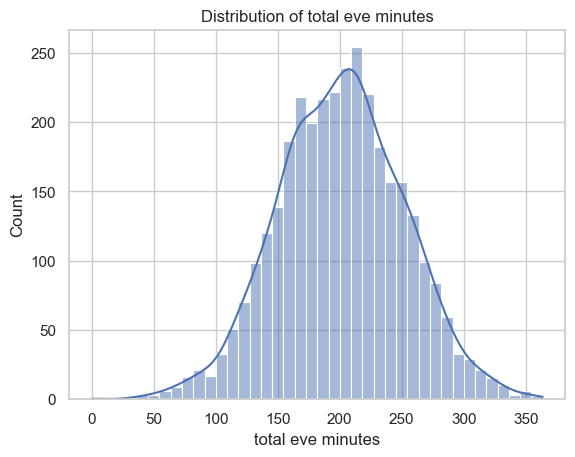

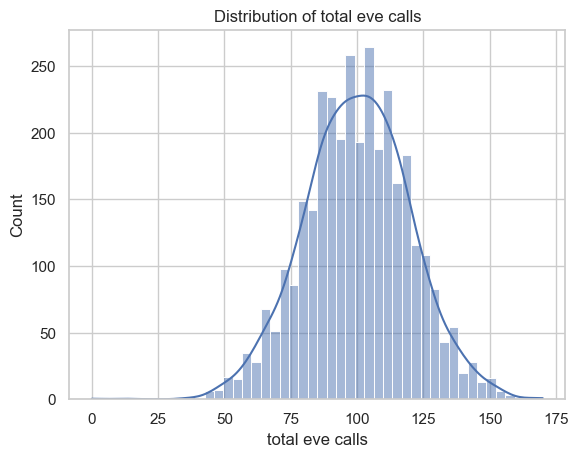

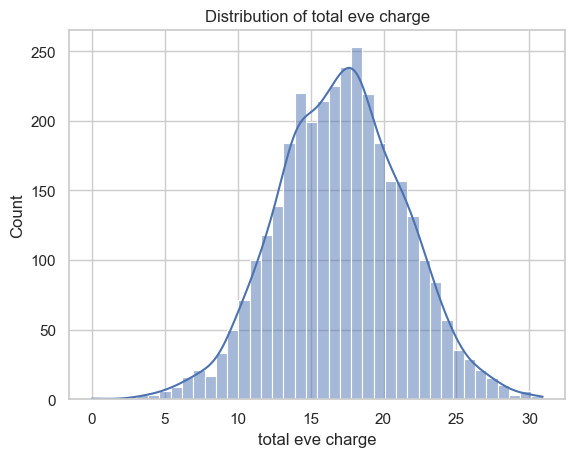

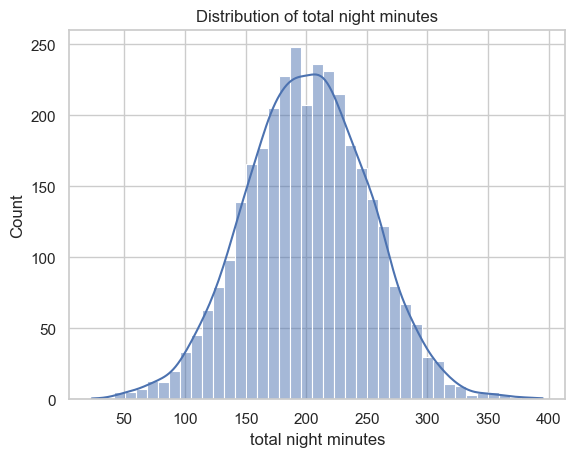

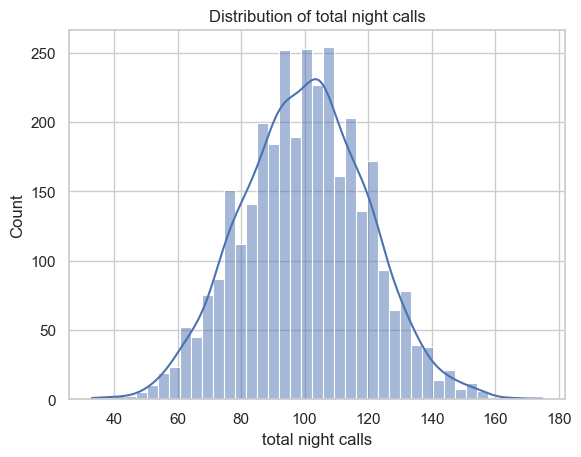

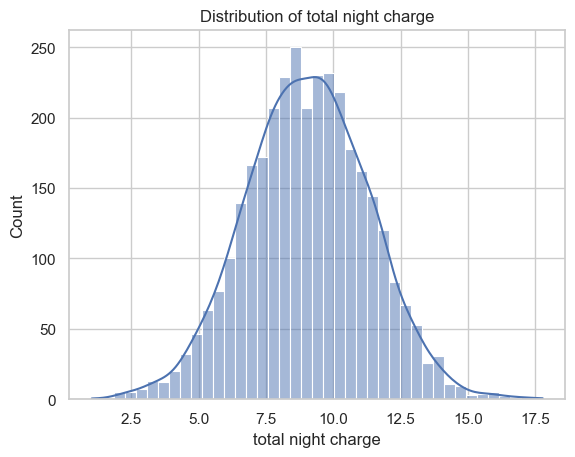

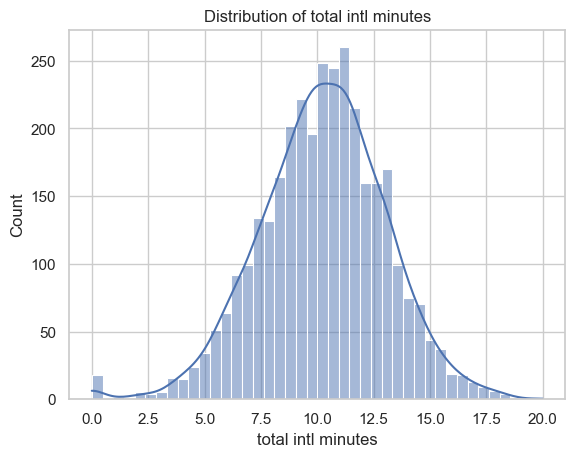

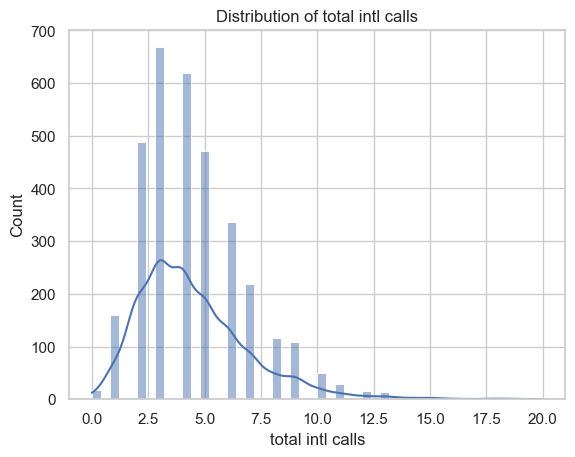

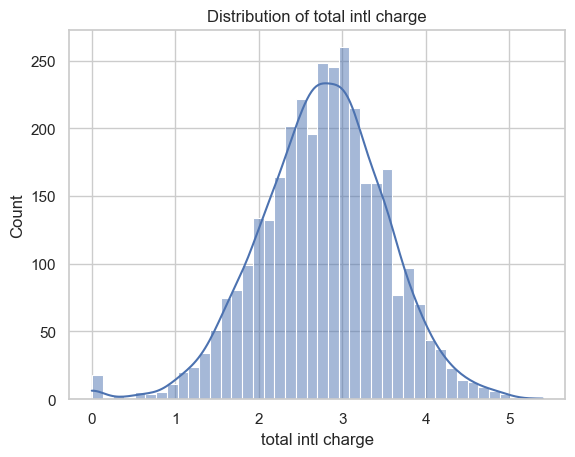

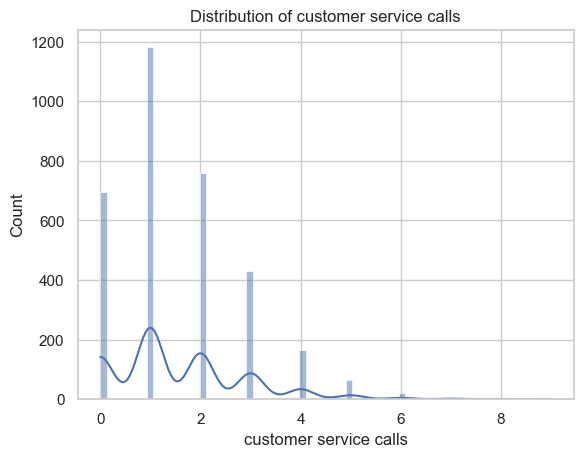

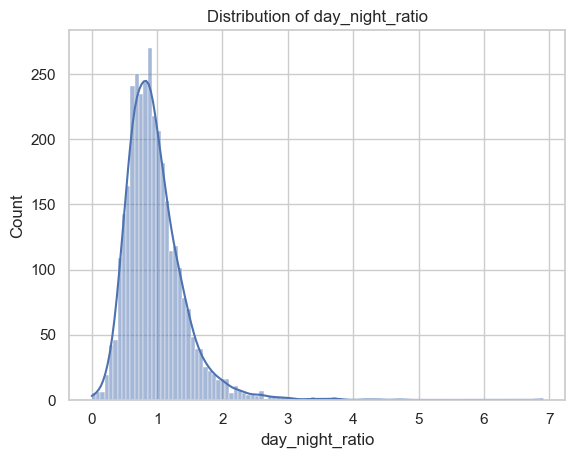

In [60]:
# Visualize the distribution of numerical features
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


Univariate Analysis and Bivariate & Multivariate Analysis

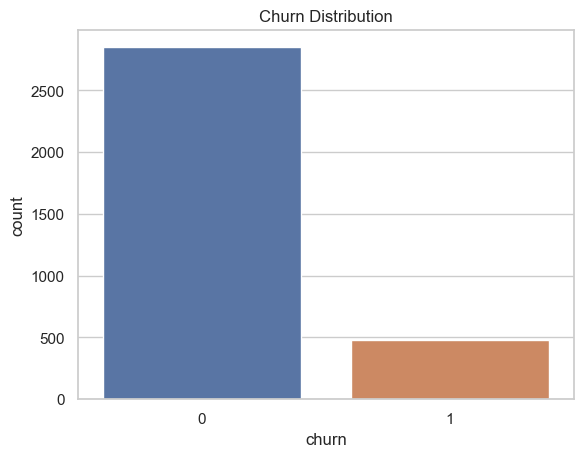

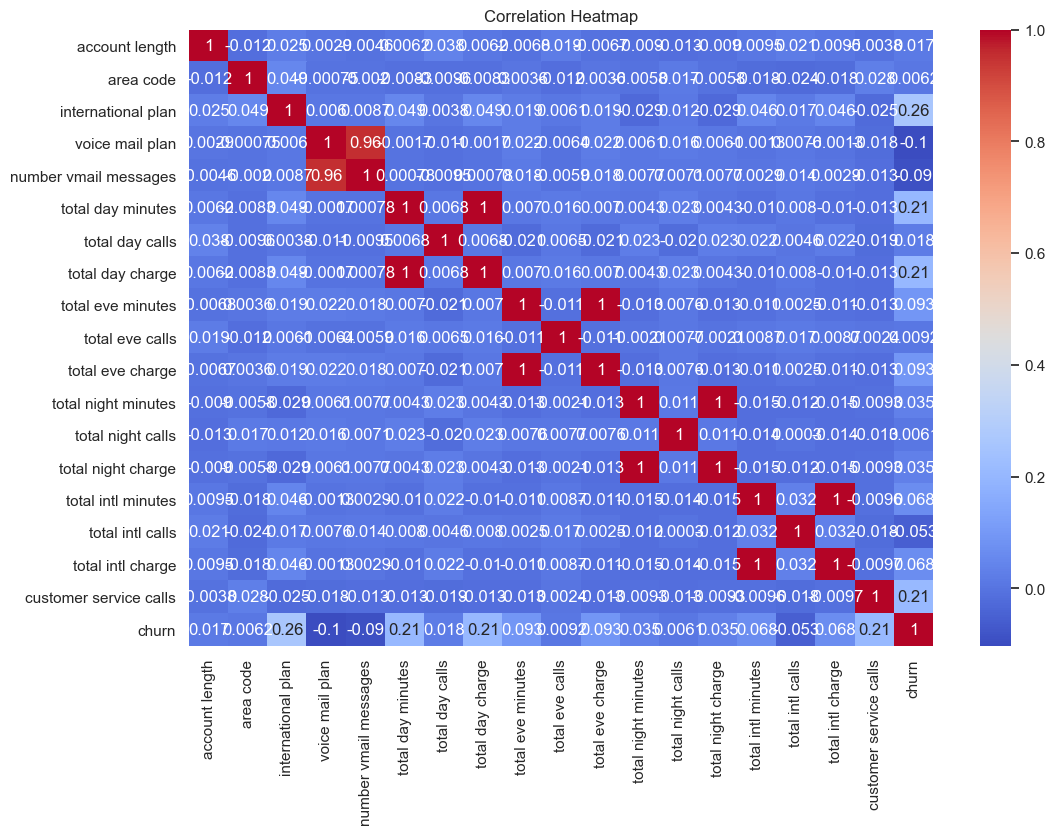

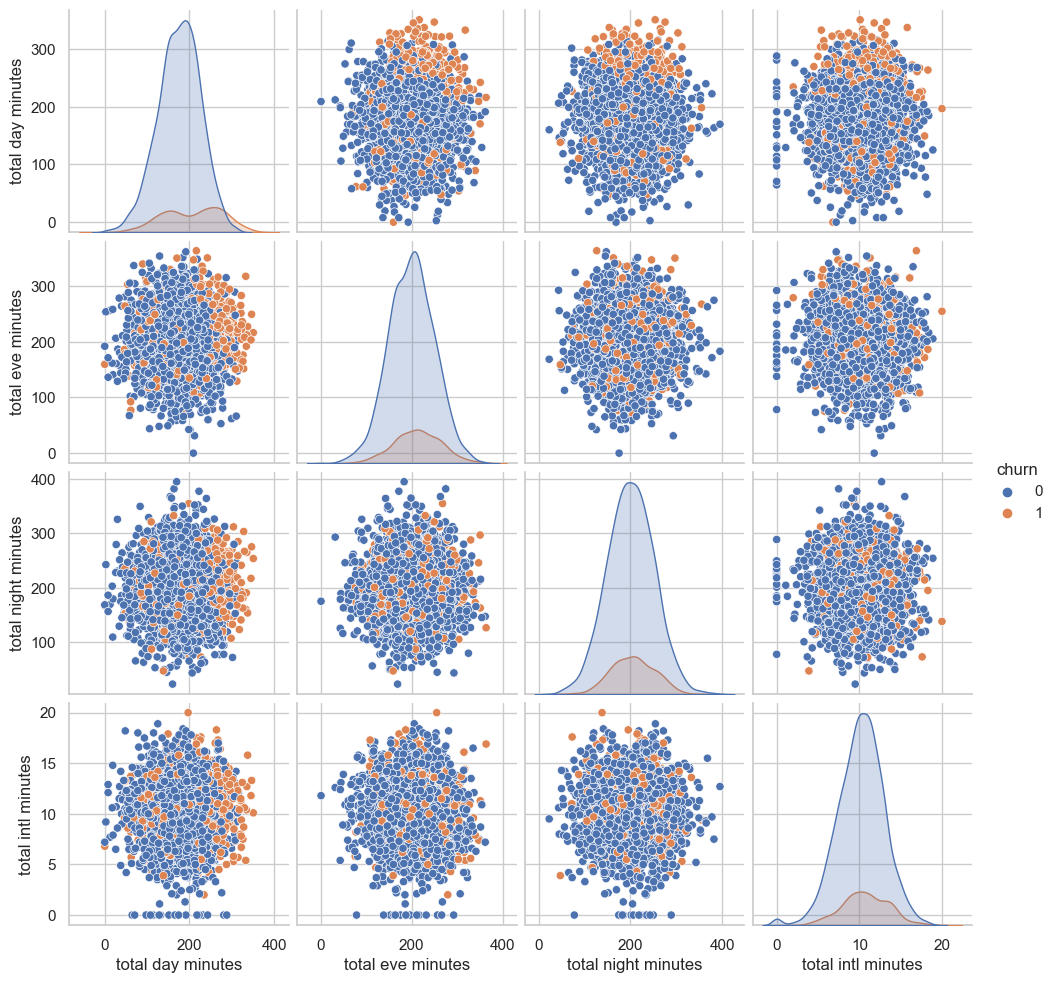

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(df['churn'])
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of key features
sns.pairplot(df, hue='churn', vars=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])
plt.show()


Modeling
Goal: Build and evaluate classification models.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Defining features and target variable
X = df.drop(columns=['churn'])  # Features (drop 'churn' column)
y = df['churn']  # Target variable

In [16]:
# Identify categorical features
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [17]:
# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# Combine encoded categorical features with the rest of the dataset
X = X.drop(categorical_features, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
# Baseline model using the DummyClassifier
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [21]:
# Make predictions
y_pred_baseline = baseline_model.predict(X_test)

In [22]:
# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
confusion_baseline = confusion_matrix(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_baseline)

print(f"Baseline Model - Accuracy: {accuracy_baseline:.4f}, Precision: {precision_baseline:.4f}, Recall: {recall_baseline:.4f}, F1 Score: {f1_baseline:.4f}, ROC-AUC: {roc_auc_baseline:.4f}")
print("Confusion Matrix:\n", confusion_baseline)

Baseline Model - Accuracy: 0.8550, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, ROC-AUC: 0.5000
Confusion Matrix:
 [[855   0]
 [145   0]]


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [26]:
# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

In [27]:
print(f"Logistic Regression Model - Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, F1 Score: {f1_logistic:.4f}, ROC-AUC: {roc_auc_logistic:.4f}")
print("Confusion Matrix:\n", confusion_logistic)

Logistic Regression Model - Accuracy: 0.8530, Precision: 0.4167, Recall: 0.0345, F1 Score: 0.0637, ROC-AUC: 0.7181
Confusion Matrix:
 [[848   7]
 [140   5]]


In [28]:
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

In [30]:
# Evaluate the decision tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
confusion_tree = confusion_matrix(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

In [31]:
print(f"Decision Tree Model - Accuracy: {accuracy_tree:.4f}, Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}, F1 Score: {f1_tree:.4f}, ROC-AUC: {roc_auc_tree:.4f}")
print("Confusion Matrix:\n", confusion_tree)

Decision Tree Model - Accuracy: 0.9410, Precision: 0.8707, Recall: 0.6966, F1 Score: 0.7739, ROC-AUC: 0.8395
Confusion Matrix:
 [[840  15]
 [ 44 101]]


Plot ROC Curves for All Models

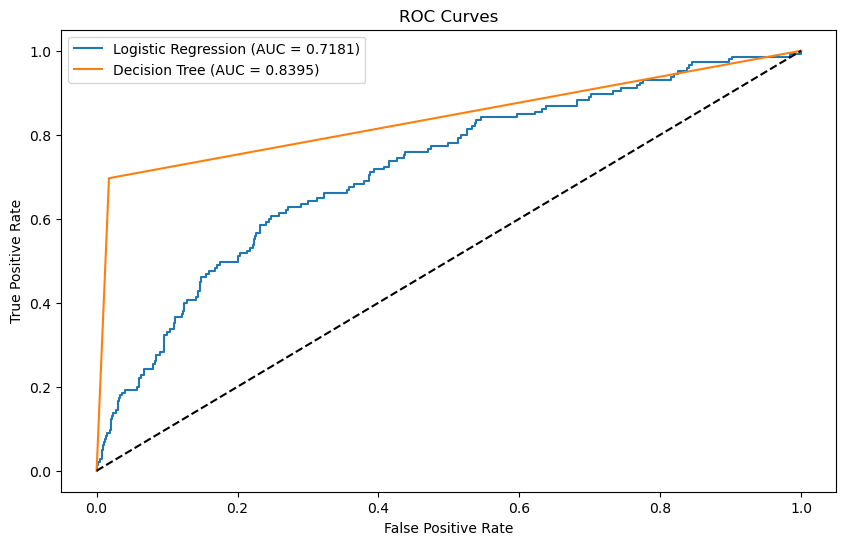

In [32]:
# Plot ROC curves for all models
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_logistic))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

comparing models metrics values

In [33]:
# Compare the models
results = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_baseline, accuracy_logistic, accuracy_tree],
    'Precision': [precision_baseline, precision_logistic, precision_tree],
    'Recall': [recall_baseline, recall_logistic, recall_tree],
    'F1 Score': [f1_baseline, f1_logistic, f1_tree],
    'ROC-AUC': [roc_auc_baseline, roc_auc_logistic, roc_auc_tree]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0             Baseline     0.855   0.000000  0.000000  0.000000  0.500000
1  Logistic Regression     0.853   0.416667  0.034483  0.063694  0.718072
2        Decision Tree     0.941   0.870690  0.696552  0.773946  0.839504


In [53]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [54]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Random Forest Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.68      0.78       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



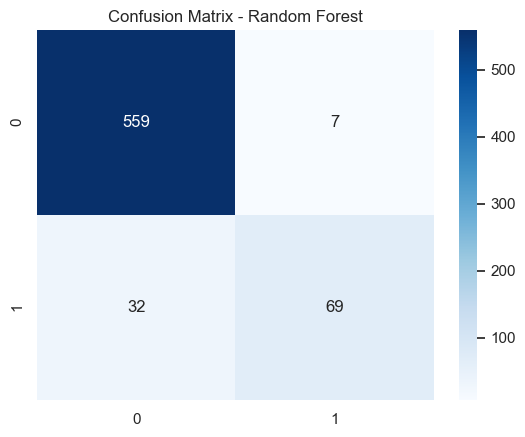

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Baseline Model: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))

# Improved Model: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [52]:
# Predict on the test set using the best model (e.g., Random Forest)
y_pred = rf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[559   7]
 [ 28  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.94       667

Accuracy Score: 0.9475262368815592


 Model Validation & Hyperparameter Tuning
Goal: Validate the model and fine-tune hyperparameters

In [55]:
# Predict on the test set using the best model (e.g., Random Forest)
y_pred = rf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[559   7]
 [ 28  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.94       667

Accuracy Score: 0.9475262368815592


In [48]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.9557405962996535


In [56]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_rf.predict(X_test)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Feature Engineering
Goal: Improve model performance by creating new features or modifying existing ones.

In [49]:
# Example of feature engineering: Interaction term
df['day_night_ratio'] = df['total day minutes'] / df['total night minutes']

# Re-train the model with new features
features = df.drop(columns=['state', 'churn'])
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['churn'], test_size=0.2, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest with Feature Engineering Report:\n", classification_report(y_test, y_pred_rf))


Random Forest with Feature Engineering Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.94       667



 Recommendations
Goal: Provide actionable insights based on model findings.

- Focus retention efforts on customers with high day-to-night call ratios.
- Monitor customers with frequent calls to customer service; they are at higher risk of churn.
- Consider offering tailored packages to customers without an international plan to reduce churn.


Visualization & Reporting

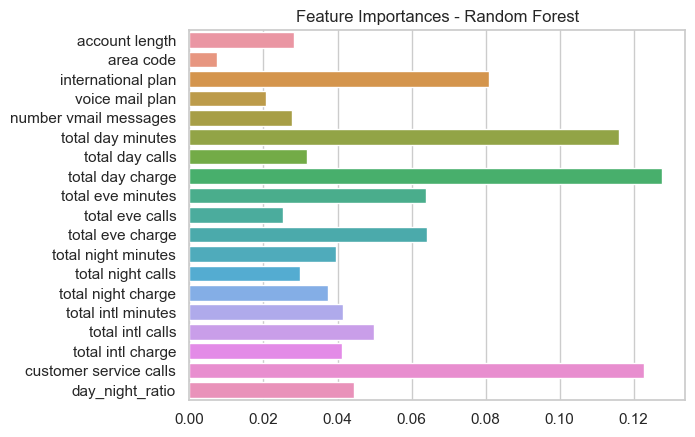

In [50]:
# Visualization: Feature Importances for Random Forest
feature_importances = rf.feature_importances_
feature_names = features.columns

sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances - Random Forest')
plt.show()
